In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_excel("for feature selection May 19.xlsx")
data.head()

,Gross Load,Total coal flow (T/hr),Feed water flow rate,Total PA flow,Total Air flow,Total Secondary air flow,SADC damper position,secondary air outlet pressure,PA temp at mill inlet,secondary air temp at windbox,...,secondary air temp APH B outlet,Flue gas temp APH A inlet,Flue gas temp APH A outlet,Flue gas temp APH B inlet,Flue gas temp APH B outlet,Calorific value of fuel (kJ/kg),Unburnt carbon in Bottom Ash (%),Unburnt carbon in Fly Ash (%),Excess air,Total Efficiency BR+BX
0,210.9370,134.0827,668.7497,269.0101,697.5522,426.8821,39.3576,211.5545,233.8708,265.3836,...,253.5637,319.5526,139.3246,337.6624,141.9017,14864.486,5.0,1.82,14.084863,69.815341
1,206.1874,135.2202,661.3517,274.6753,692.8755,419.3383,33.4414,203.7725,235.9359,267.4223,...,256.6135,319.3768,139.3246,337.6624,141.9017,14864.486,5.0,1.82,17.514731,68.381356
2,148.7090,102.6820,508.4293,263.3038,629.5214,365.8234,18.1024,170.1691,207.4389,258.2560,...,244.4071,304.6339,133.2103,321.8367,135.8546,14864.486,5.0,1.82,37.334340,66.648272
3,149.9336,103.7501,503.1259,265.7200,631.5493,368.5298,17.0714,171.8632,207.5121,257.2514,...,244.4071,304.6339,132.2103,322.8464,134.8537,14864.486,5.0,1.82,37.334340,66.322073
4,148.1824,104.9364,508.2944,270.8655,629.2057,358.6974,13.5494,168.5206,221.4354,256.2358,...,242.3976,304.6339,128.0707,324.8652,130.7463,14864.486,5.0,1.82,37.334340,64.763897


In [3]:
data.shape

(1953, 48)

In [4]:
data=data.drop_duplicates()
data.shape

(1953, 48)

In [5]:
# Checking % of missing values in each column #
def missing_valu_pct(df):
    counts = df.isnull().sum()/df.shape[0]*100
    miss_df = pd.DataFrame({'Missing Value Pct':counts.index,'Counts':counts})
    return miss_df[miss_df.Counts>0]

missing_df=missing_valu_pct(data)
missing_df.sort_values("Counts",ascending=False)

,Missing Value Pct,Counts


In [6]:
############### Remove the zero variance feature ##############
from sklearn.feature_selection import VarianceThreshold
threshold_n=0.95
sel = VarianceThreshold(threshold=(threshold_n* (1 - threshold_n) ))
sel_var=sel.fit_transform(data)
constant_columns = [column for column in data.columns
                    if column not in data.columns[sel.get_support()]]
print(len(constant_columns))
constant_columns

2


['Condenser vacuum', 'Unburnt carbon in Fly Ash (%)']

In [7]:
data.drop(constant_columns,axis=1,inplace=True)

In [8]:
data.shape

(1953, 46)

In [9]:
#Removing Outliers >3 standard deviations using Zscore
from scipy import stats
idx = np.all(stats.zscore(data) <= 3, axis=1)
data_cleaned=data.loc[idx]
data_cleaned.shape

(1836, 46)

In [10]:
data1=data_cleaned.drop('Total Efficiency BR+BX',axis=1)

In [11]:
corr=data1.corr().abs()
high_corr =np.where(corr>0.8)
high_corr=[(corr.columns[x],corr.columns[y]) for x,y in zip(*high_corr) if x!=y and x<y]
print("*"*20,"highly corr variable","*"*20)
high_corr

******************** highly corr variable ********************


[('Gross Load', 'Total coal flow  (T/hr)'),
 ('Gross Load', 'Feed water flow rate'),
 ('Gross Load', 'Total Air flow'),
 ('Gross Load', 'Total  Secondary air flow'),
 ('Gross Load', 'secondary air outlet pressure'),
 ('Gross Load', 'Hot reheat pressure at IPT Inlet (kg/cm2)'),
 ('Gross Load', 'Hot reheat pressure at HPT outlet (kg/cm2)'),
 ('Gross Load', 'MS flow at HPT Inlet (T/hr)'),
 ('Gross Load', 'Feed water flow rate.1'),
 ('Gross Load', 'Feed water temp at  Economizer Inlet'),
 ('Gross Load', 'Feed water pressure at Eco inlet(kg/cm2)'),
 ('Gross Load', 'Feed water pressure at Eco outlet'),
 ('Gross Load', 'Primary air temp APH B outlet'),
 ('Gross Load', 'Flue gas temp APH A inlet'),
 ('Gross Load', 'Flue gas temp APH B inlet'),
 ('Gross Load', 'Excess air'),
 ('Total coal flow  (T/hr)', 'Feed water flow rate'),
 ('Total coal flow  (T/hr)', 'Total Air flow'),
 ('Total coal flow  (T/hr)', 'Total  Secondary air flow'),
 ('Total coal flow  (T/hr)', 'Hot reheat pressure at IPT Inlet

In [12]:
x=data_cleaned.drop('Total Efficiency BR+BX',axis=1)
y=data_cleaned['Total Efficiency BR+BX']
x.shape,y.shape

((1836, 45), (1836,))

In [13]:
# Split into train and test sets # stratify method 
# change test size to however much you want the proportion to be for test set #
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1993)
col_names=X_train.columns
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

<IPython.core.display.Javascript object>

(1468, 45) (1468,)
(368, 45) (368,)


In [14]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=300, random_state=1993,max_features=40,
                                      max_depth = 12,
                                      min_samples_leaf=3,n_jobs=-1)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [15]:
import numpy as np
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 0.9610193374097042
Mean Squared Error (MSE): 1.839026479341928
Root Mean Squared Error (RMSE): 1.3561071046720197
Mean Absolute Percentage Error (MAPE): 1.25
Accuracy: 98.75


In [16]:
from sklearn.metrics import accuracy_score,r2_score
r2_score=r2_score(y_test,y_pred)
r2_score

0.9540145996116427

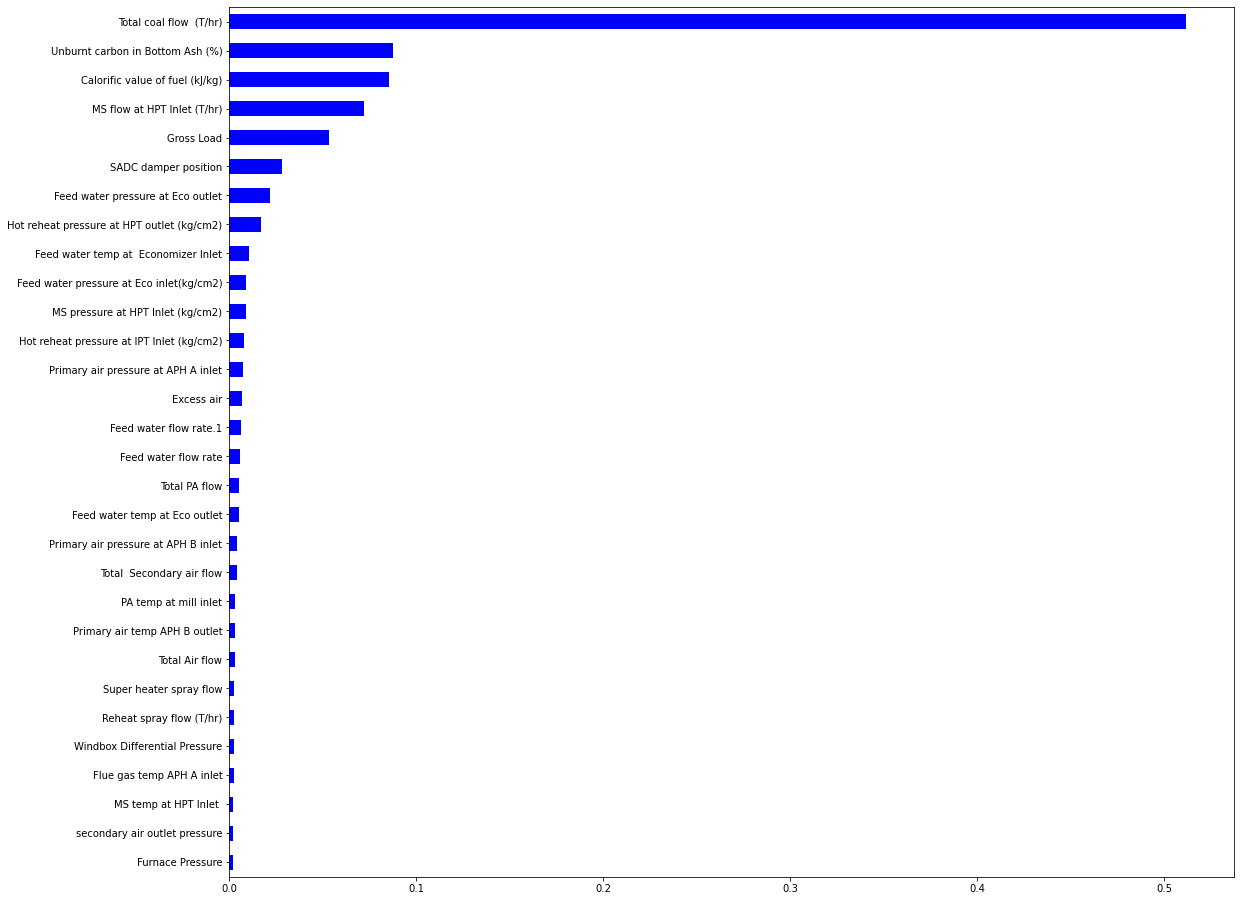

In [17]:
############################### VarImp Plot #################################
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(18,16))
feat_importance = pd.Series(regressor.feature_importances_, index = x.columns).sort_values(ascending=True)
feat_importance.nlargest(30).sort_values(ascending=True).plot(kind = 'barh',color="blue")

In [18]:
feat_importance1=feat_importance

In [19]:
# To filter the columns
feat_importance1=pd.DataFrame(feat_importance1,columns=["values"]).reset_index()
feat_importance1.columns=["name","values"]
feat_importance1=feat_importance1.sort_values("values",ascending=False)
feat_importance1["sum_val"]=feat_importance1["values"].cumsum()
print(feat_importance1)
# feat_importance.loc[feat_importance.sum_val<0.99,"name"].tolist()

                                          name    values   sum_val
44                     Total coal flow  (T/hr)  0.511712  0.511712
43            Unburnt carbon in Bottom Ash (%)  0.087387  0.599099
42             Calorific value of fuel (kJ/kg)  0.085474  0.684573
41                 MS flow at HPT Inlet (T/hr)  0.072057  0.756630
40                                  Gross Load  0.053182  0.809812
39                        SADC damper position  0.028032  0.837844
38           Feed water pressure at Eco outlet  0.021567  0.859410
37  Hot reheat pressure at HPT outlet (kg/cm2)  0.017114  0.876524
36        Feed water temp at  Economizer Inlet  0.010450  0.886974
35    Feed water pressure at Eco inlet(kg/cm2)  0.008909  0.895883
34           MS pressure at HPT Inlet (kg/cm2)  0.008658  0.904542
33   Hot reheat pressure at IPT Inlet (kg/cm2)  0.007866  0.912408
32         Primary air pressure at APH A inlet  0.007505  0.919913
31                                  Excess air  0.006861  0.92

# Scaling the features

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index.values, columns=X_train.columns.values)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index.values, columns=X_test.columns.values)

In [21]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=300, random_state=1993,max_features=40,
                                      max_depth = 12,
                                      min_samples_leaf=3,n_jobs=-1)
regressor.fit(X_train_scaled, y_train)
y_pred = regressor.predict(X_test_scaled)

In [22]:
import numpy as np
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 0.9610113948812975
Mean Squared Error (MSE): 1.8389769166155385
Root Mean Squared Error (RMSE): 1.3560888306506835
Mean Absolute Percentage Error (MAPE): 1.25
Accuracy: 98.75


In [23]:
from sklearn.metrics import accuracy_score,r2_score
r2_score=r2_score(y_test,y_pred)
r2_score

0.9540158389422576

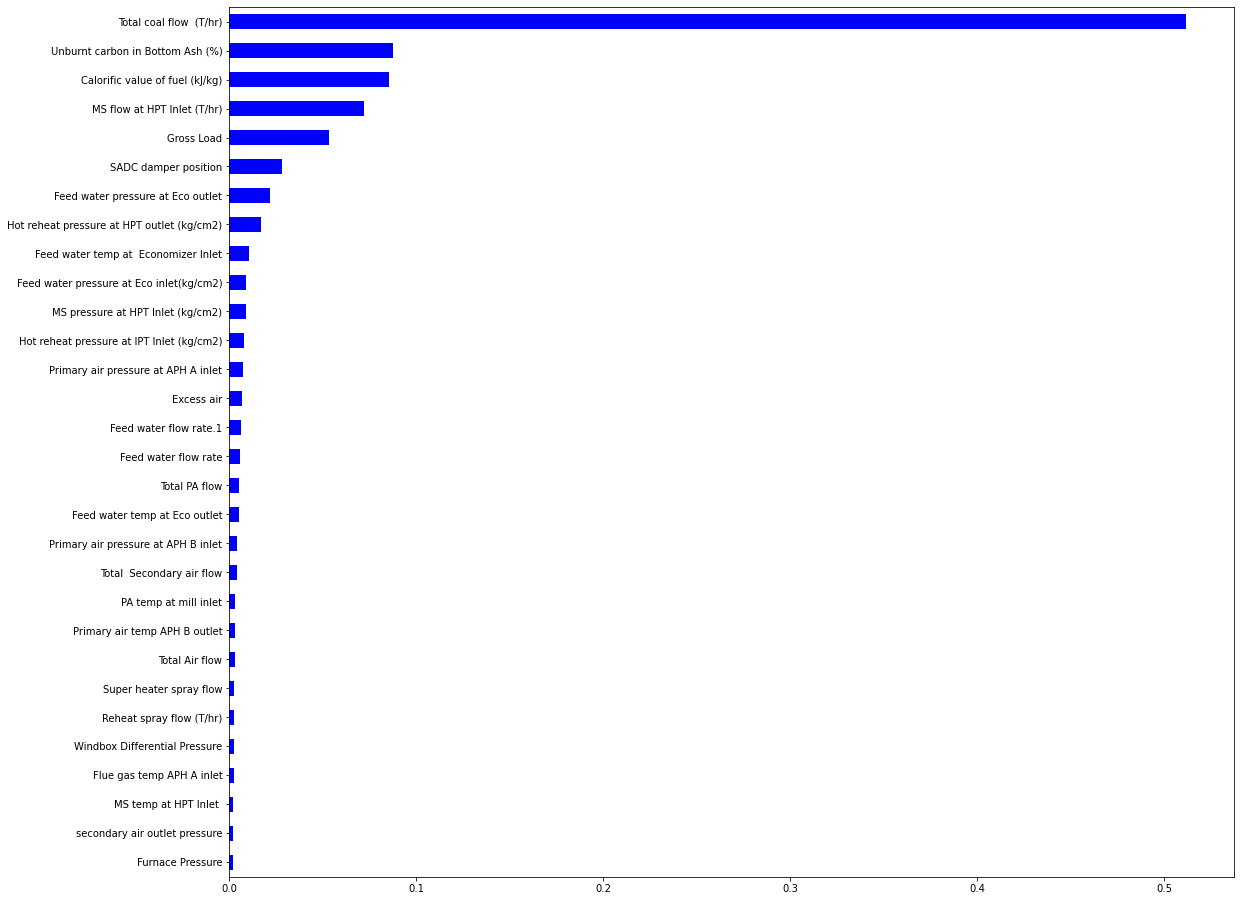

In [24]:
############################### VarImp Plot #################################
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(18,16))
feat_importance = pd.Series(regressor.feature_importances_, index = x.columns).sort_values(ascending=True)
feat_importance.nlargest(30).sort_values(ascending=True).plot(kind = 'barh',color="blue")